<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

!pip install plotly --upgrade 

     |████████████████████████████████| 68 kB 2.5 MB/s 

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite
     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os
import plotly.express as px
%matplotlib inline
import matplotlib.style as style

style.use("fivethirtyeight")
style.use('seaborn-poster')

plt.rcParams['font.family'] = 'sans-serif'

In [7]:
customer = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/marketing_campaign.csv',sep='\t')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
customer = customer.dropna()

In [12]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth

In [13]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer['Month_Customer'] = 12.0 * (2015 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)

In [14]:
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds

In [15]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [16]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']

In [17]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

Text(0, 0.5, 'Age')

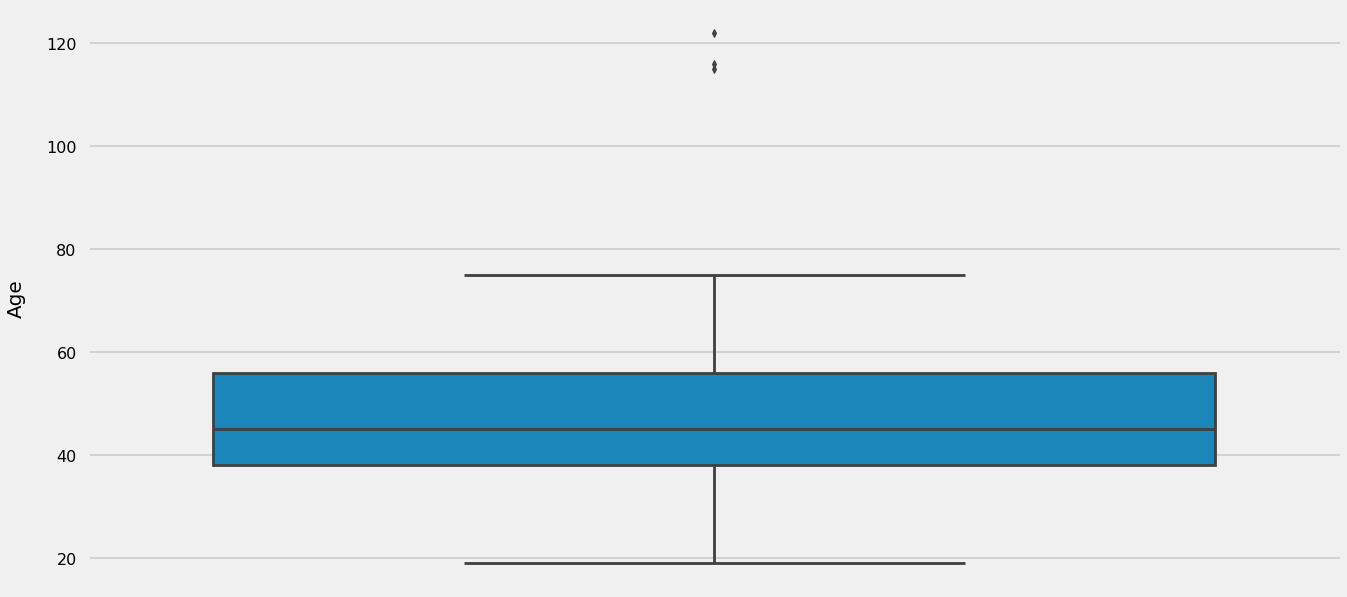

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(y=customer.Age);
plt.ylabel('Age', fontsize=20, labelpad=20)

Text(0, 0.5, 'Income')

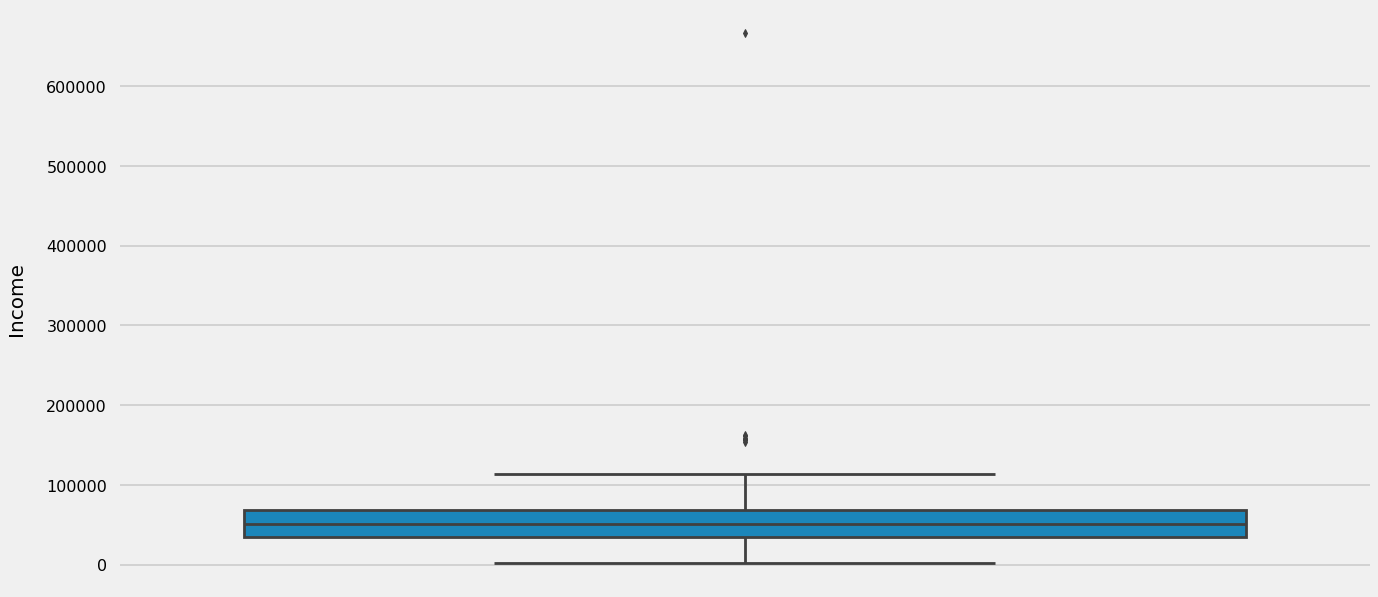

In [19]:

plt.figure(figsize=(20,10))
sns.boxplot(y=customer.Income);
plt.ylabel('Income', fontsize=20, labelpad=20)

In [20]:
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]

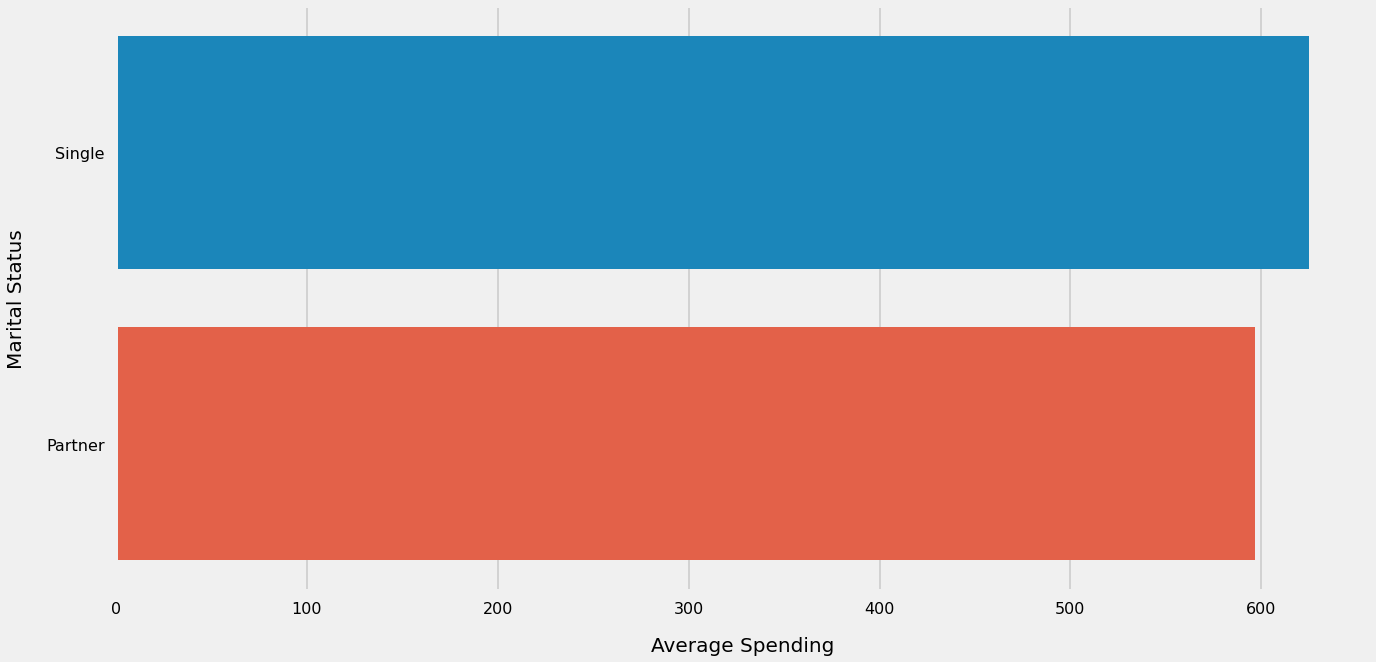

In [21]:
maritalspending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

Text(0, 0.5, 'Average Spending')

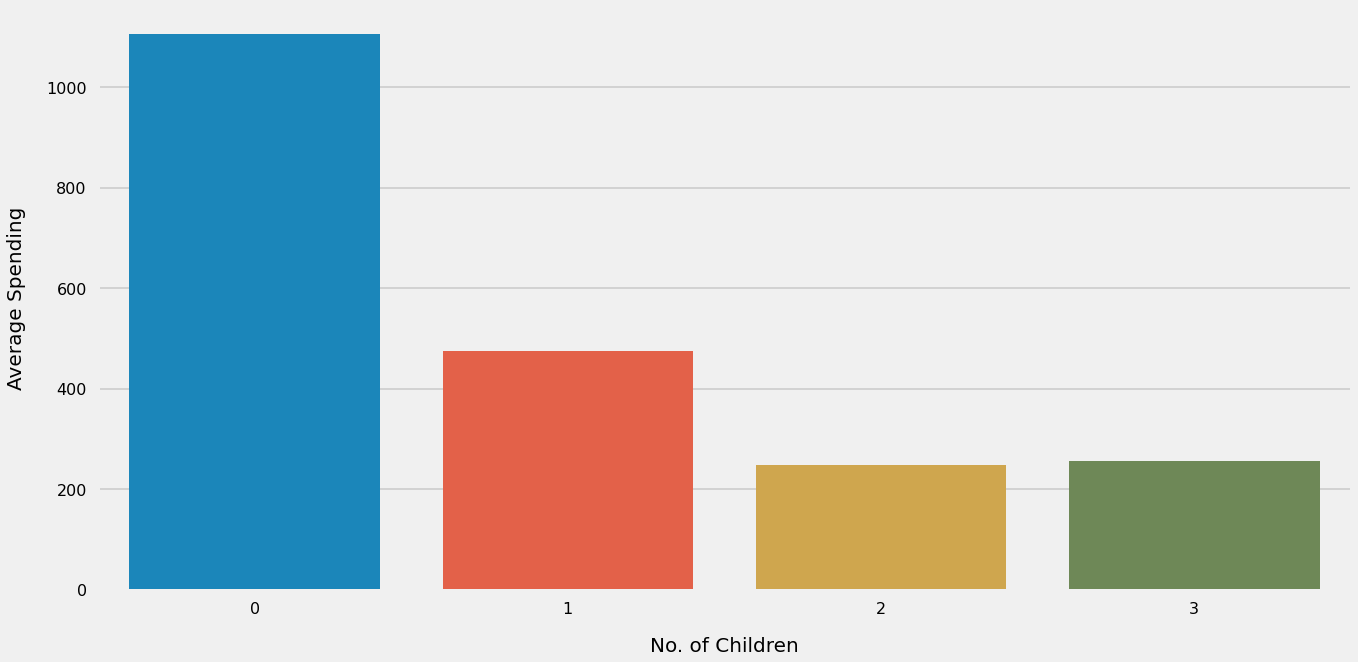

In [22]:
childrenspending = customer.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20)

Text(0, 0.5, 'Counts')

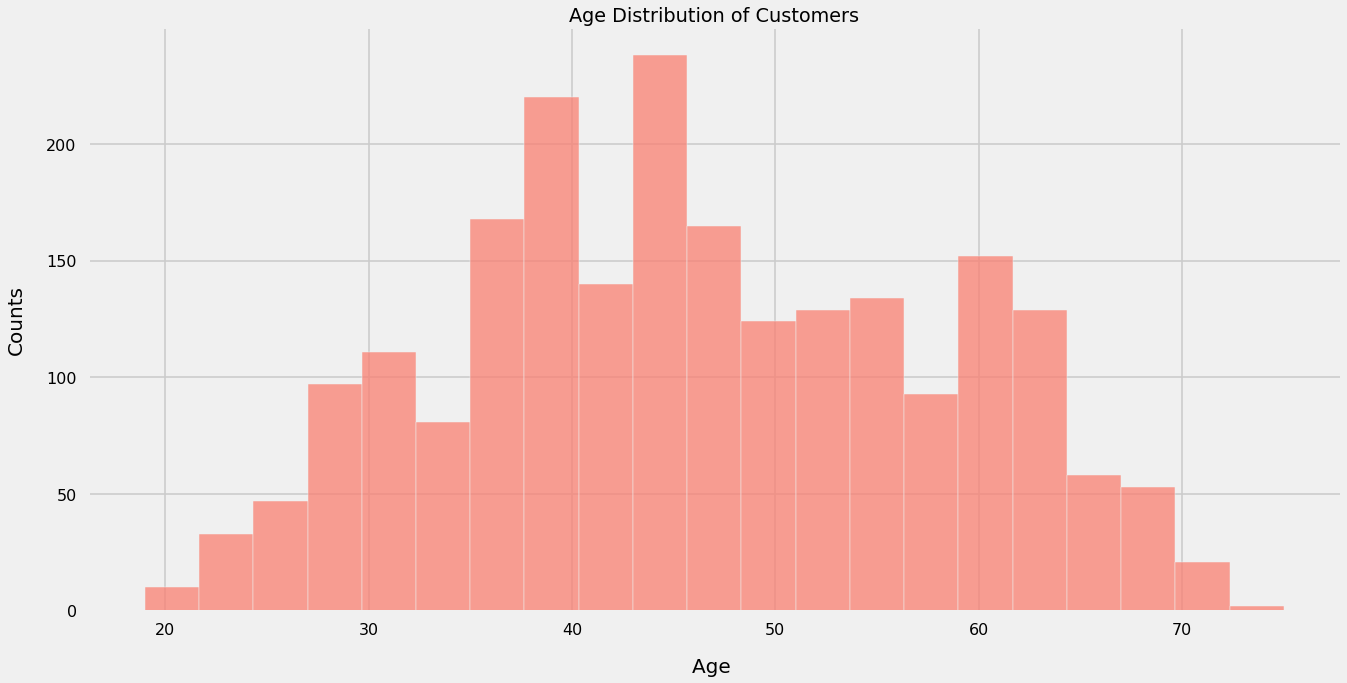

In [23]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data = customer.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)

Text(0, 0.5, 'Spendings')

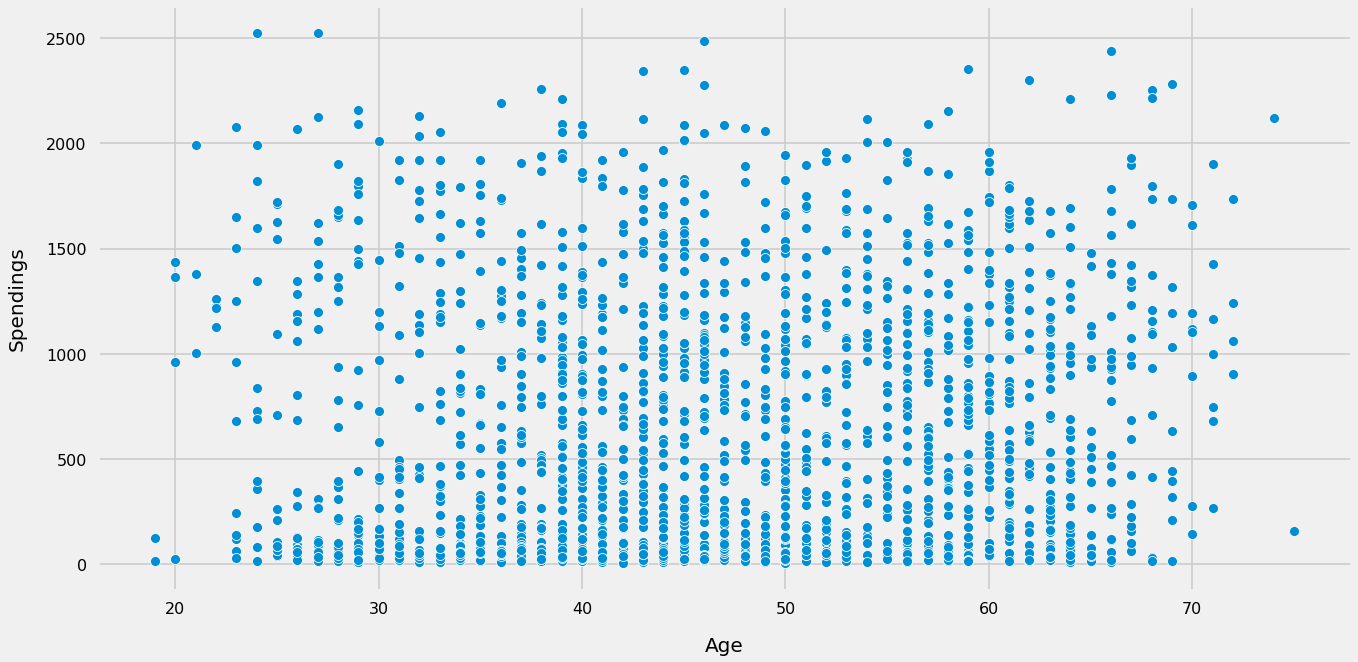

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Age, y=customer.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

Text(0, 0.5, 'Counts')

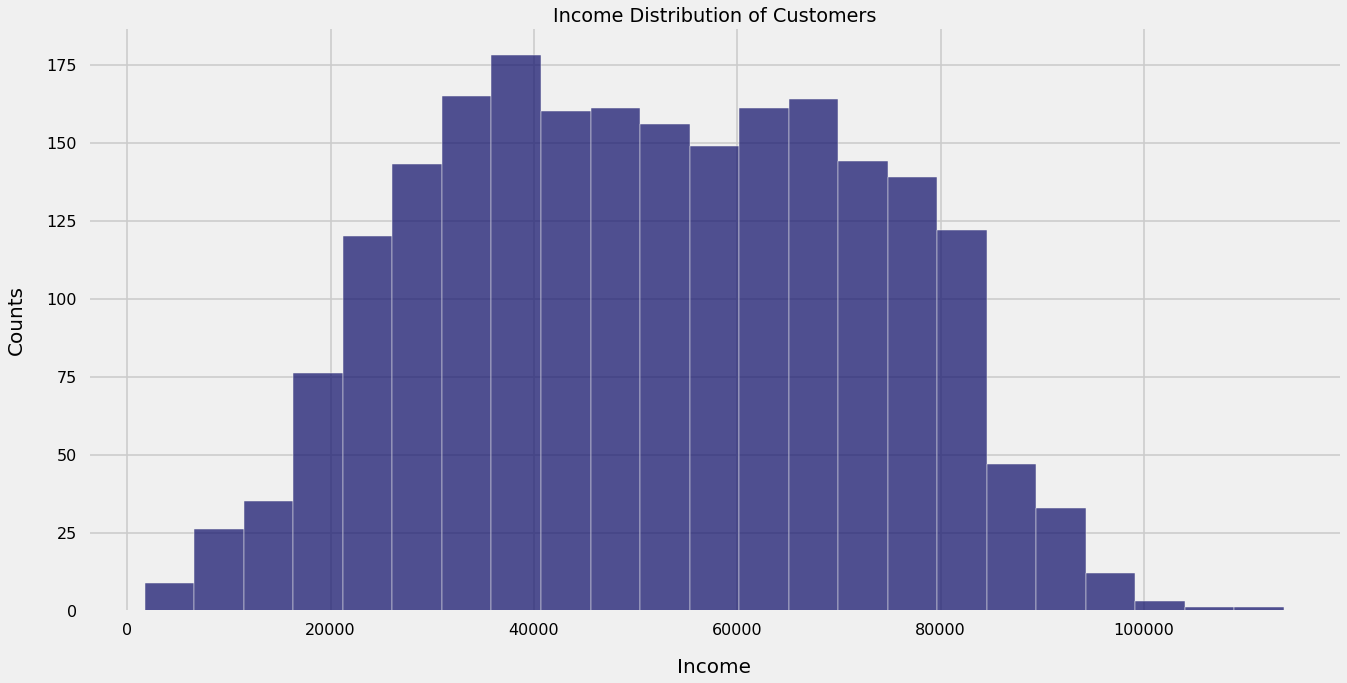

In [26]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = customer.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)

Text(0, 0.5, 'Spendings')

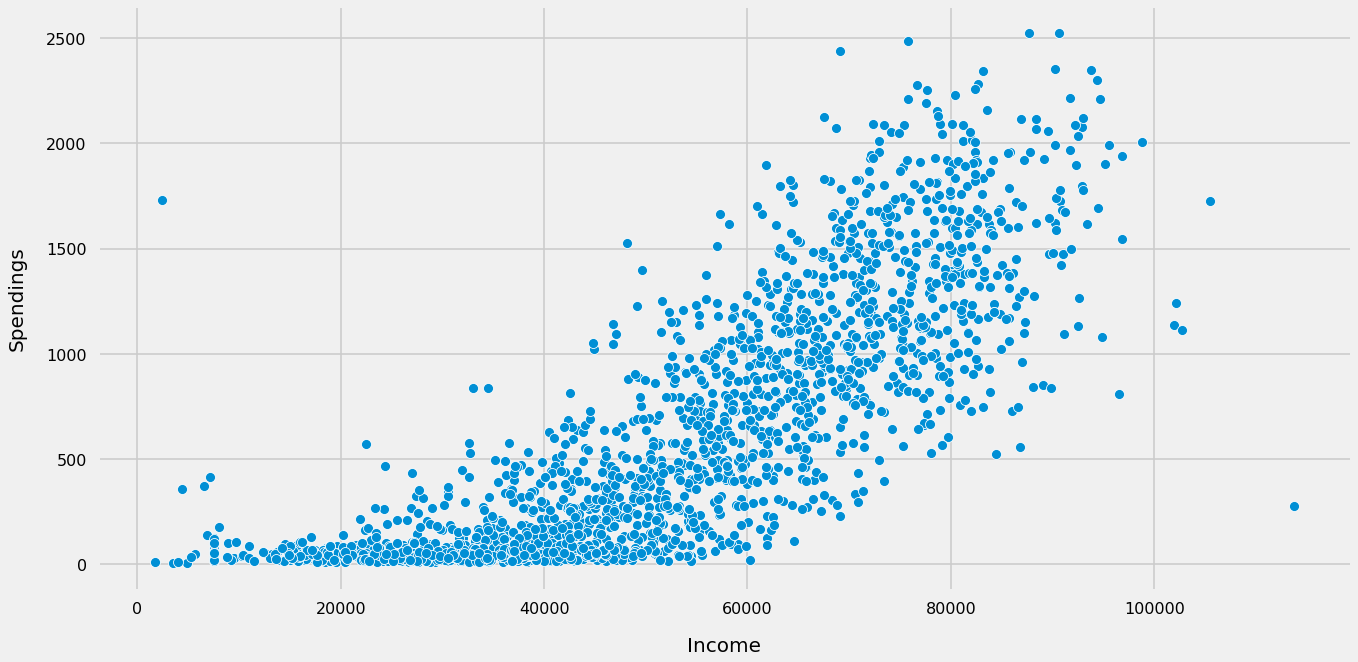

In [27]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=customer.Income, y=customer.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

Text(0, 0.5, 'Average Spending')

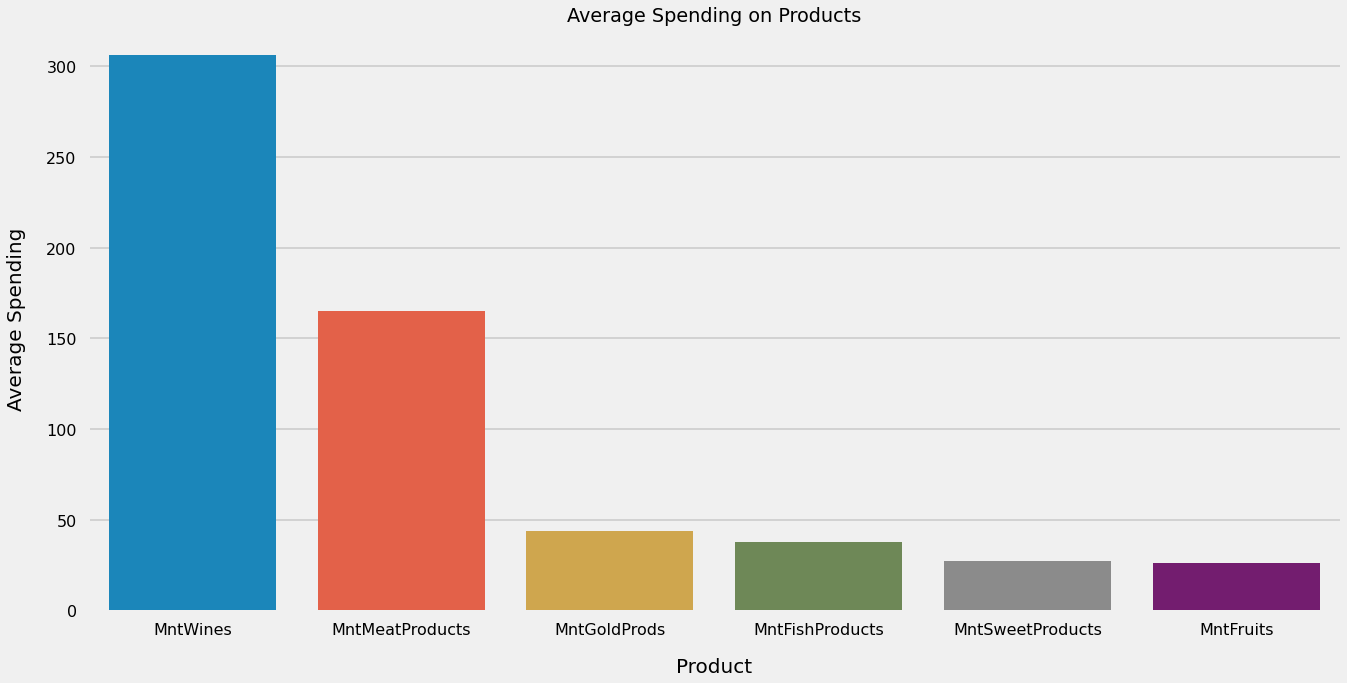

In [29]:

products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(20,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20)


In [30]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)

Text(0, 0.5, 'Inertia')

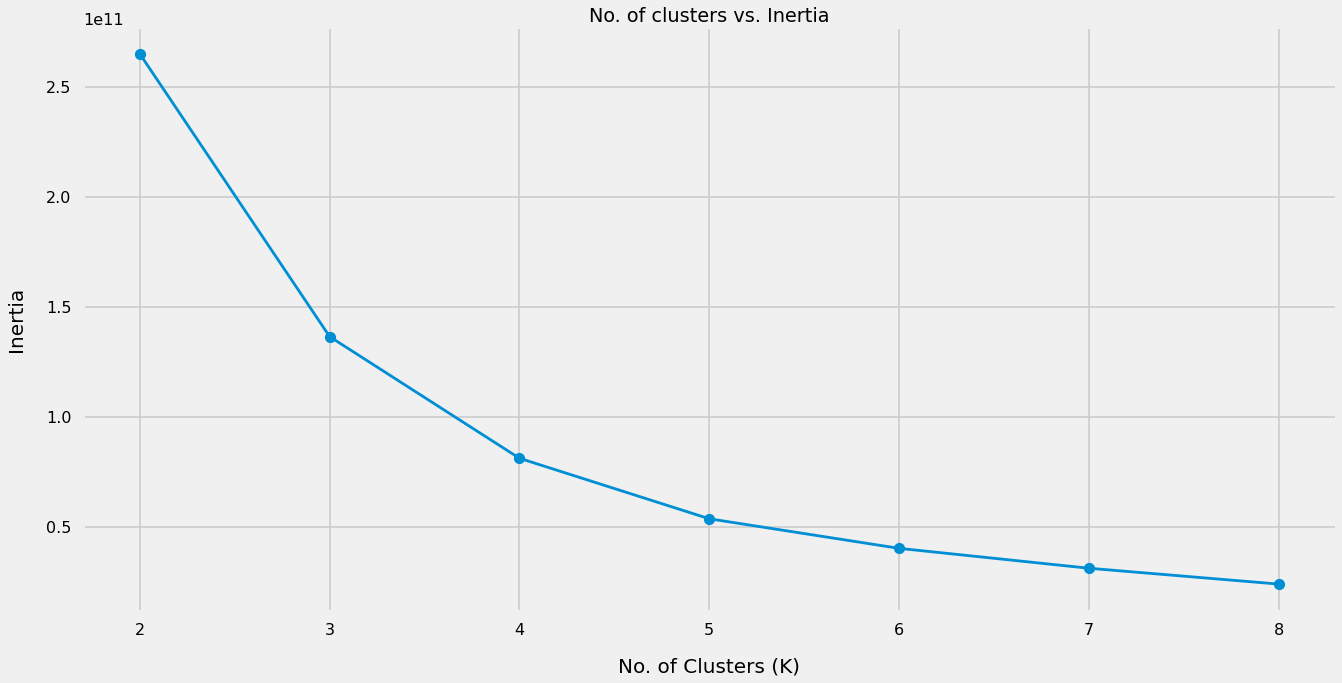

In [31]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20)

In [32]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

Text(0, 0.5, 'Income')

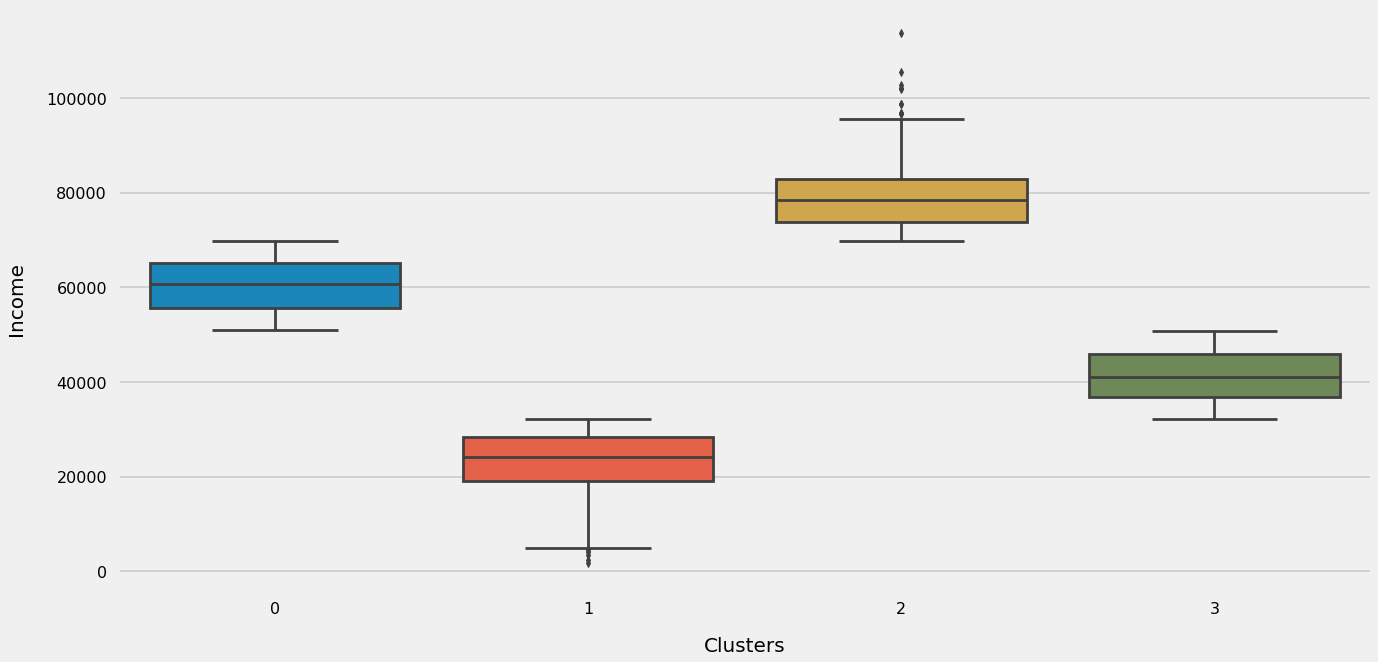

In [33]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20)

Text(0, 0.5, 'Spendings')

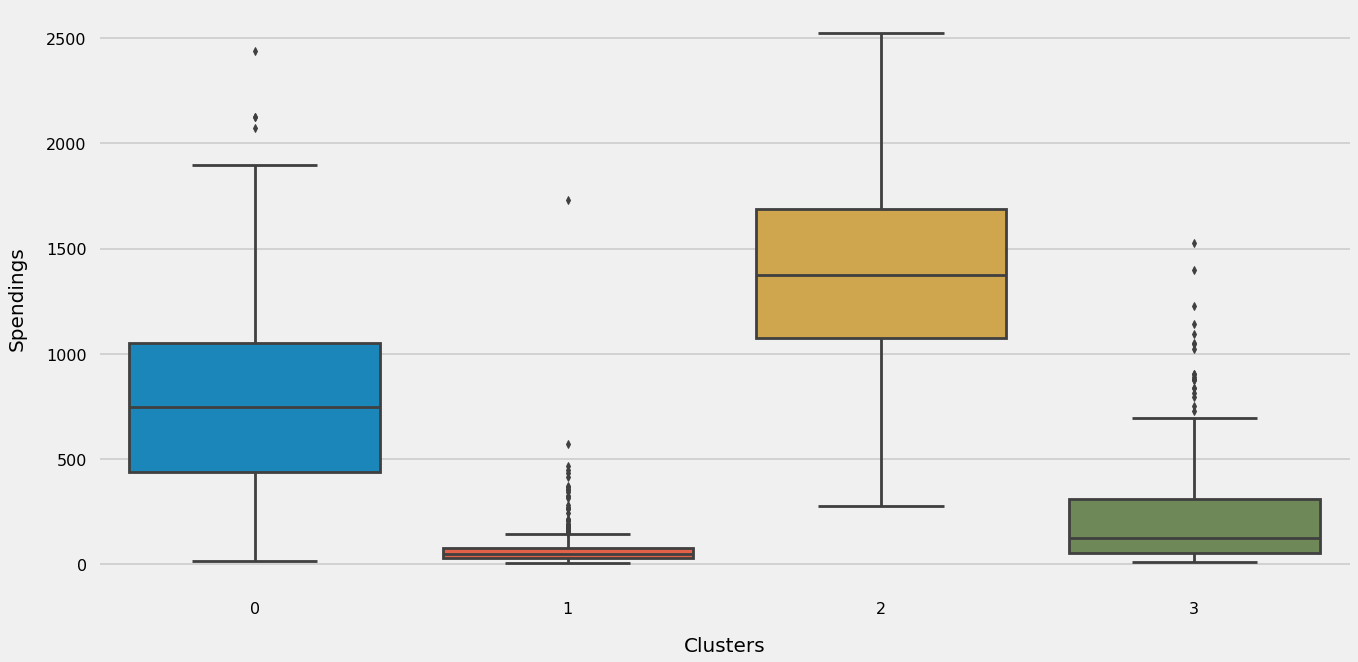

In [34]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

Text(0, 0.5, 'Month Since Customer')

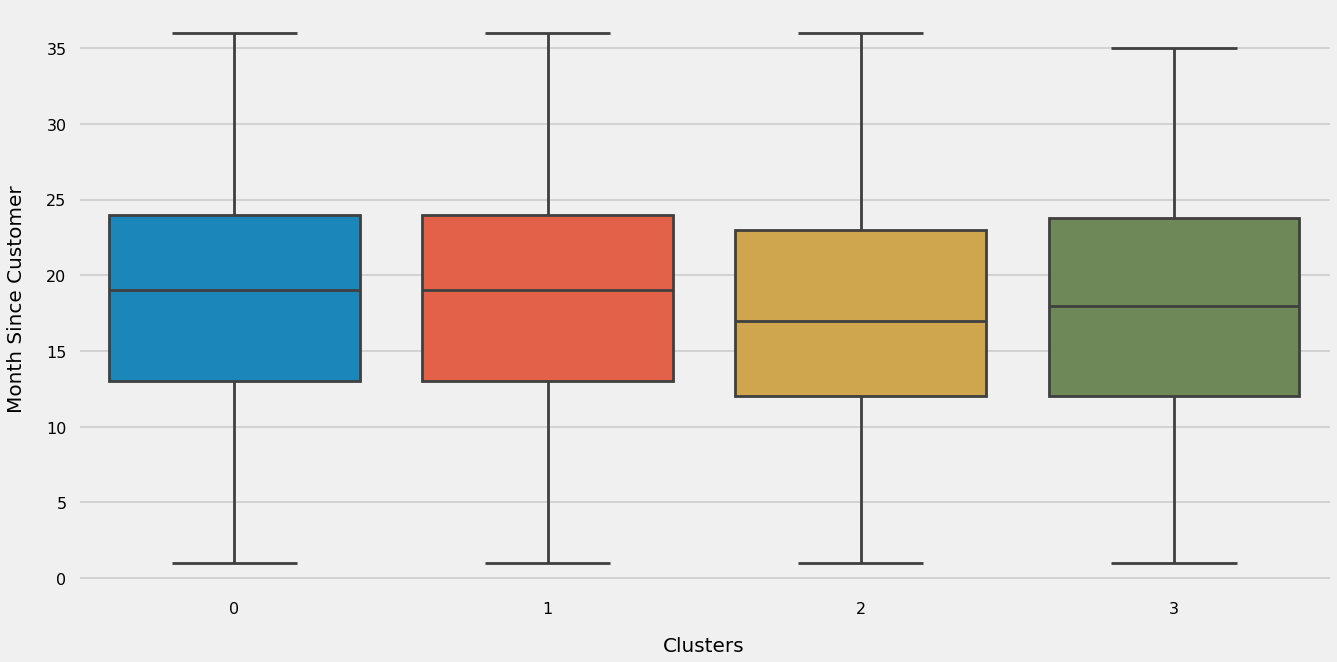

In [35]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20)

Text(0, 0.5, 'Age')

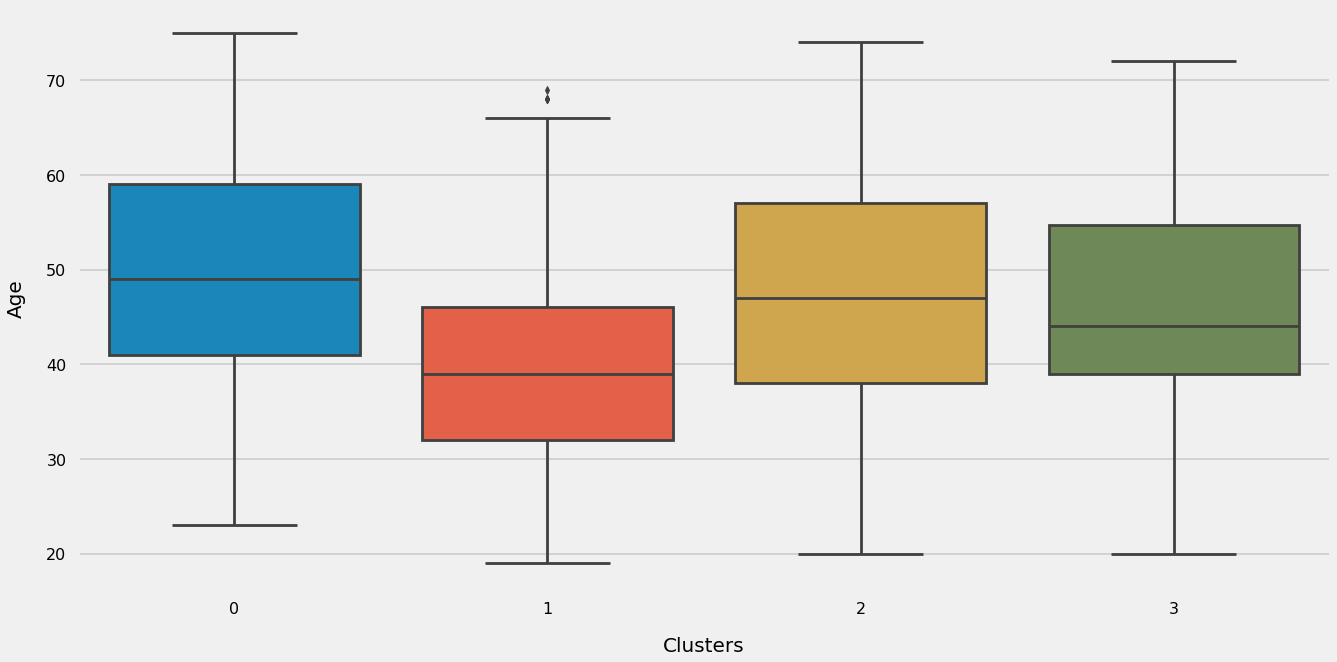

In [36]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20)

Text(0, 0.5, 'no. of Children')

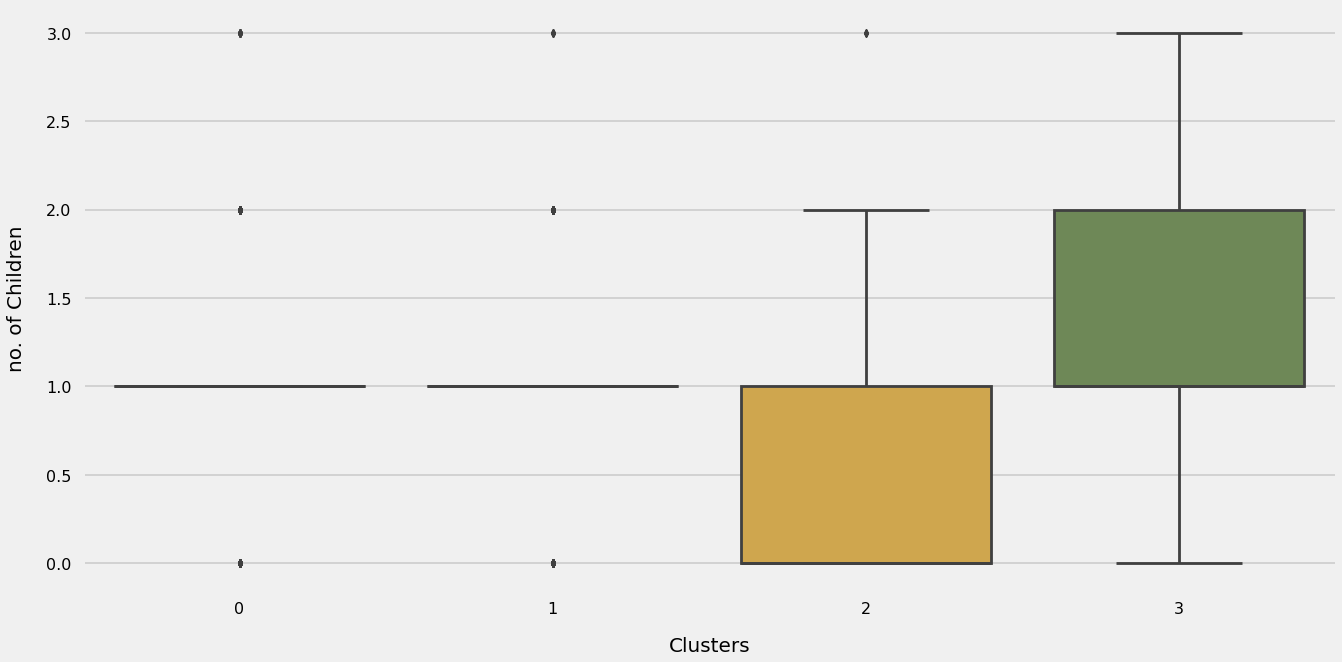

In [37]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('no. of Children', fontsize=20, labelpad=20)

In [38]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Bronze',
                                                             2: 'Platinum',
                                                             3: 'Silver',
                                                             0: 'Gold'})

customer['clusters'] = customer_kmeans.clusters

Text(0, 0.5, 'Total Spendings')

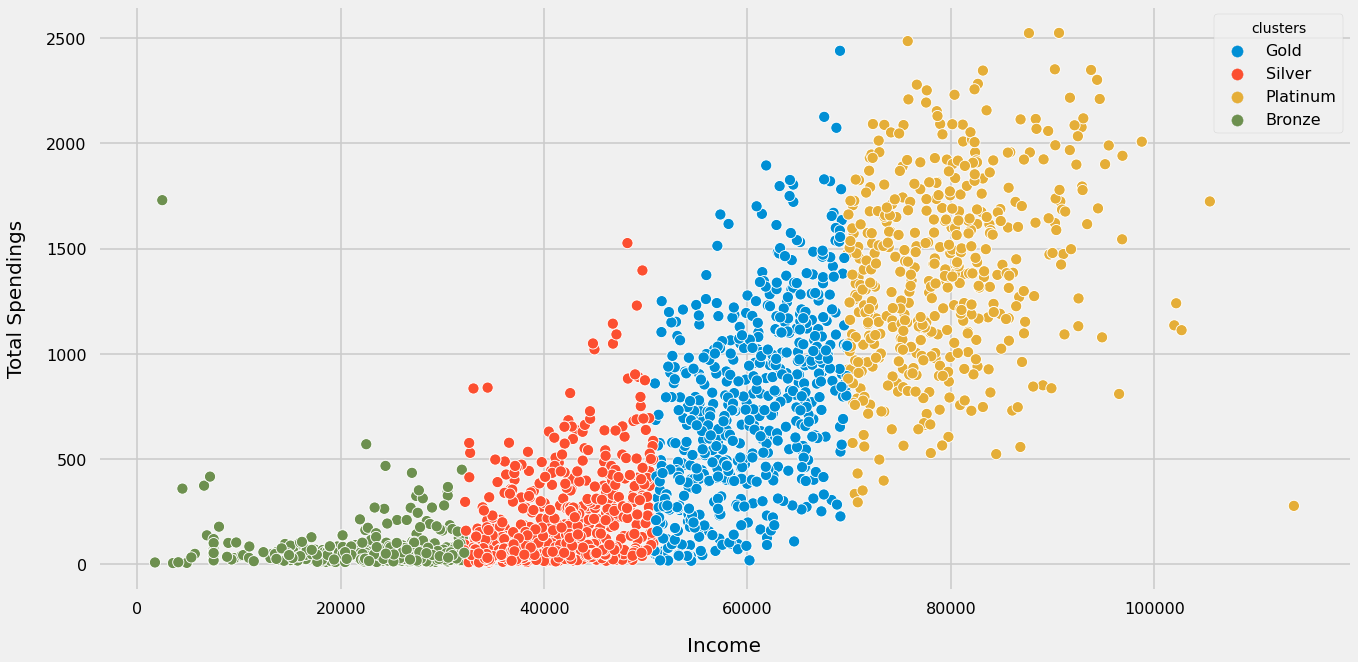

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

<Figure size 2160x1080 with 0 Axes>

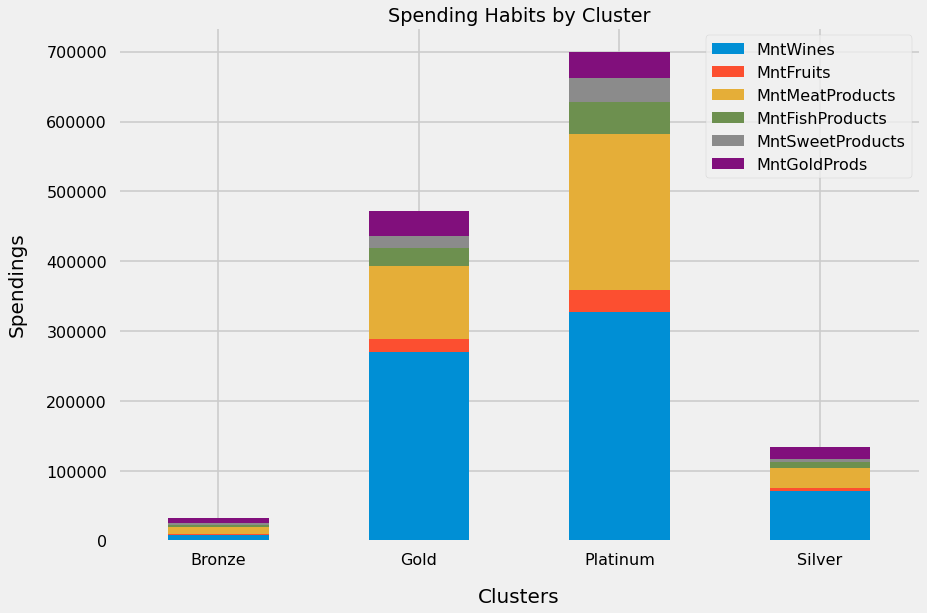

In [40]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

<Figure size 2160x1080 with 0 Axes>

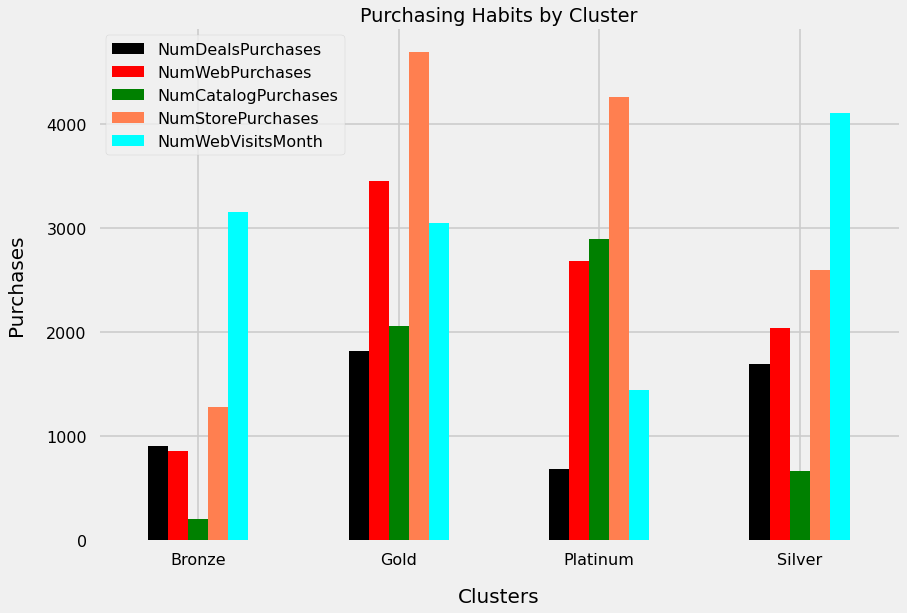

In [41]:

cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_purchases.plot(kind='bar', color=['black', 'red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

<Figure size 2160x1080 with 0 Axes>

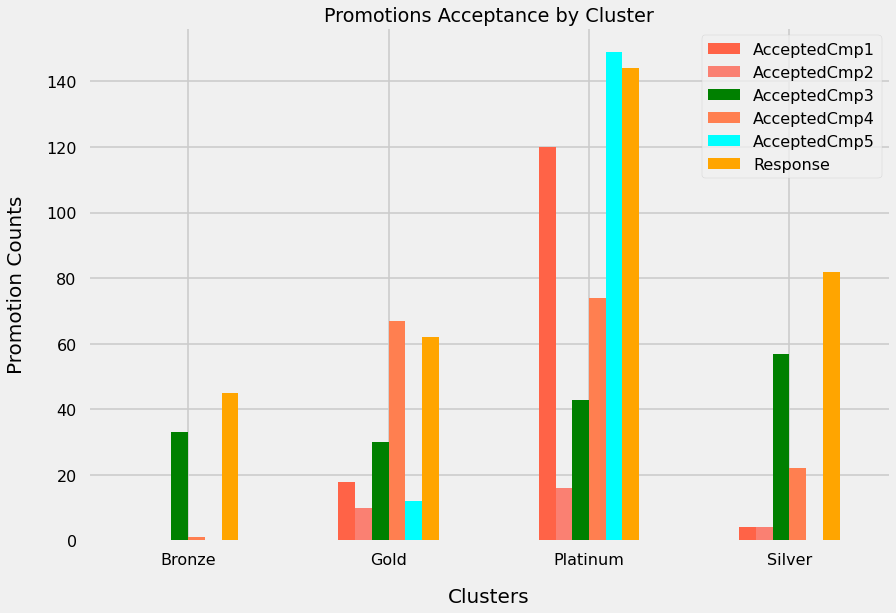

In [42]:

cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['tomato', 'salmon', 'green', 'coral', 'cyan', 'orange'])

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center')

### Conclusion

### 1. What are the statistical characteristics of the customers?

The company's customers are mostly married. There are more Middle Aged Adults, aged between 40 and 60 and most of them like to have one child. Most of the customers hold bachelor degree and their earnings are mostly between 25,000 and 85,000.

### 2. What are the spending habits of the customers?

Customers have spent more on wine and meat products. Those without children have spent more than those having children. Singles are spending more than the one's with the partners. Middle aged adults have spent more than the other age groups. Store shopping is the preferred channel for purchasing among the customers. Web and Catalog purchasing also have potential

### 3. Are there some products which need more marketing?

Sweets and Fruits need some effective marketing. Company needs to run promotions for these products in order to increase the revenue from these products. Baskets of the least selling products combined with the most selling products can be effective.

### 4. How the marketing can be made effective?

As a marketing recommendation give coupons to the old and high spending customers. Market the cheap and on-offer products to the low income and low spending customers. Web purchasing has some potential. To unlock this give special discounts to the customers who sign up on company's website